In [59]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from utils_nans1 import *

# učitavamo podatke i ispis prvih nekoliko redova 

df = pd.read_csv('data/portuguese_train.csv', sep=',')
df.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,70,GP,F,15,Rural,Less than or equal to 3,Living together,secondary education,primary education (4th grade),other,...,4,4,2,2,3,3,6,15,15,15
1,71,GP,M,16,Urban,Greater than 3,Living together,secondary education,primary education (4th grade),other,...,4,3,2,1,1,5,2,13,11,11
2,72,GP,M,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,other,...,3,3,3,1,1,3,0,11,9,10
3,73,GP,F,15,Rural,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,...,3,3,4,2,4,5,2,13,11,11
4,74,GP,M,16,Urban,Greater than 3,Living together,secondary education,primary education (4th grade),other,...,5,3,2,2,2,5,0,13,13,14


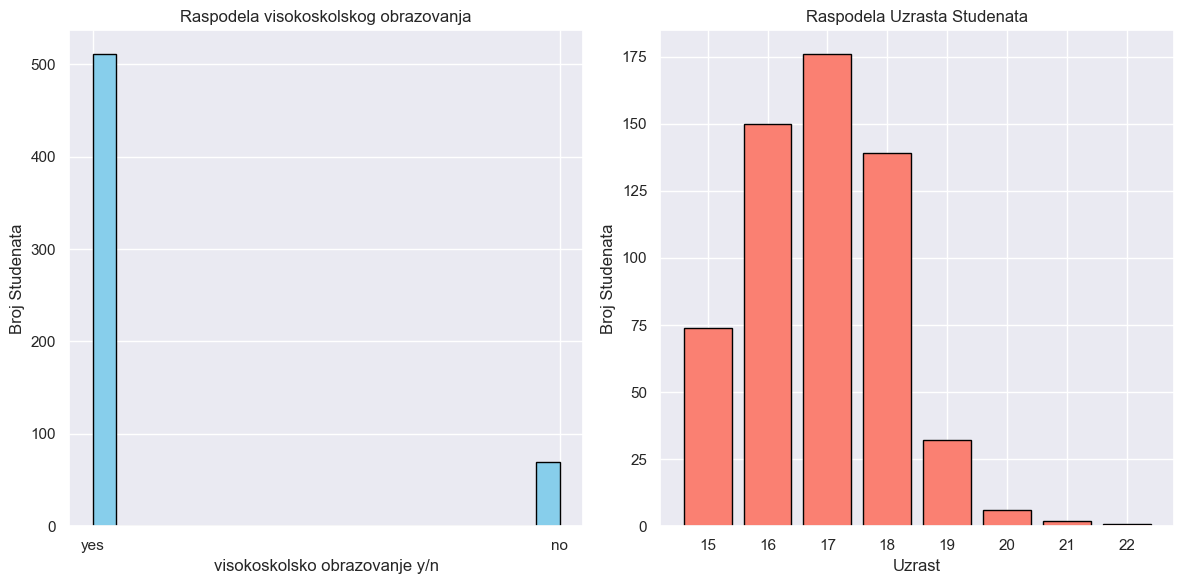

In [60]:
file_path = 'data/portuguese_train.csv' 
data = pd.read_csv(file_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['higher_ed'], bins=20, color='skyblue', edgecolor='black')
plt.title('Raspodela visokoskolskog obrazovanja')
plt.xlabel('visokoskolsko obrazovanje y/n')
plt.ylabel('Broj Studenata')

# Vizualizacija demografskih podataka (primer: uzrast)
plt.subplot(1, 2, 2)
plt.bar(data['age'].value_counts().index, data['age'].value_counts().values, color='salmon', edgecolor='black')
plt.title('Raspodela Uzrasta Studenata')
plt.xlabel('Uzrast')
plt.ylabel('Broj Studenata')

plt.tight_layout()
plt.show()

In [61]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Učitani trening podaci 
train_file_path = "data/portuguese_train.csv"
train_data = pd.read_csv(train_file_path)

# Učitani test podaci
test_file_path = "data/portuguese_test.csv"
test_data = pd.read_csv(test_file_path)

# Podeli trening podatke na ulazne (X_train) i izlazne (y_train) promenljive
X_train = train_data.drop("final_grade", axis=1)
y_train = train_data["final_grade"]

# Podeli test podatke na ulazne (X_test) i izlazne (y_test) promenljive
X_test = test_data.drop("final_grade", axis=1)
y_test = test_data["final_grade"]

# Definiši kolone koje treba obraditi (moramo paziti na tipove podataka koje uporedjujemo)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Dodajemo kolonu "higher_ed" u kategoričke promenljive
categorical_features = categorical_features.union(["higher_ed"])

# Popunjava nedostajuće vrednosti srednjom vrednošću za numeričke promenljive
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Popunjava nedostajuće vrednosti najčešćom vrednošću za kategoričke promenljive
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kombinujemo prethodna dva
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Konačan model
model = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocesiranje na trening podacima
X_train_preprocessed = model.fit_transform(X_train)

# Preprocesiranje na test podacima
X_test_preprocessed = model.transform(X_test)


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Učitaj podatke
file_path = "data/portuguese_train.csv"
data = pd.read_csv(file_path)

# Izdvoji X i y
X = data.drop(["student_id", "higher_ed"], axis=1)
y = data["higher_ed"]

# Podela podataka na trening, validacioni i test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ispis veličina setova 
print(f"Veličina trening skupa: {X_train.shape[0]} instanci")
print(f"Veličina validacionog skupa: {X_val.shape[0]} instanci")
print(f"Veličina test skupa: {X_test.shape[0]} instanci")


Veličina trening skupa: 406 instanci
Veličina validacionog skupa: 87 instanci
Veličina test skupa: 87 instanci


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Učitaj podatke
file_path = "data/portuguese_train.csv"
data = pd.read_csv(file_path)

# Izdvoji X i y
X = data.drop(["student_id", "higher_ed"], axis=1)  # Promeni target promenljivu na "higher_ed"
y = data["higher_ed"]  

# Koristi LabelEncoder za konvertovanje "yes" i "no" u numeričke vrednosti
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Podela podataka na trening i test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Definiši kolone koje treba obraditi
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Kreiraj transformer za numeričke podatke
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Kreiraj transformer za kategoričke podatke
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kombinuj transformere za sve kolone
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# L1 norma (Lasso)
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.01))
])

# L2 norma (Ridge)
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=0.01))
])

# Elastic Net (L1 + L2)
elastic_net_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('elastic_net', ElasticNet(alpha=0.01, l1_ratio=0.5))
])

# Fituj modele na trening podacima
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)

# Evaluacija modela na test setu
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"L1 norma (Lasso) - MSE: {mse_lasso}")

y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"L2 norma (Ridge) - MSE: {mse_ridge}")

y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print(f"Elastic Net - MSE: {mse_elastic_net}")

# Važnost obeležja za L1 normu (Lasso)
feature_importance_lasso = pd.Series(lasso_model.named_steps['lasso'].coef_, index=lasso_model.named_steps['preprocessor'].get_feature_names_out(X.columns))
print("Feature importance Lasso:", feature_importance_lasso)

# Važnost obeležja za L2 normu (Ridge)
feature_importance_ridge = pd.Series(ridge_model.named_steps['ridge'].coef_, index=ridge_model.named_steps['preprocessor'].get_feature_names_out(X.columns))
print("Feature importance Ridge:", feature_importance_ridge)

# Važnost obeležja za Elastic Net
feature_importance_elastic_net = pd.Series(elastic_net_model.named_steps['elastic_net'].coef_, index=elastic_net_model.named_steps['preprocessor'].get_feature_names_out(X.columns))
print("Feature importance Elastic Net:", feature_importance_elastic_net)


L1 norma (Lasso) - MSE: 0.06260907010194879
L2 norma (Ridge) - MSE: 0.07166361883303453
Elastic Net - MSE: 0.06424719830978824
Feature importance Lasso: num__age                         -0.053610
num__class_failures              -0.037857
num__family_relationship          0.000000
num__free_time                   -0.011578
num__social                      -0.000000
                                    ...   
cat__nursery_school_yes           0.000000
cat__internet_access_no          -0.000000
cat__internet_access_yes          0.000000
cat__romantic_relationship_no     0.000000
cat__romantic_relationship_yes   -0.000000
Length: 71, dtype: float64
Feature importance Ridge: num__age                         -0.050366
num__class_failures              -0.037631
num__family_relationship          0.001918
num__free_time                   -0.020747
num__social                      -0.010860
                                    ...   
cat__nursery_school_yes           0.002447
cat__internet_access

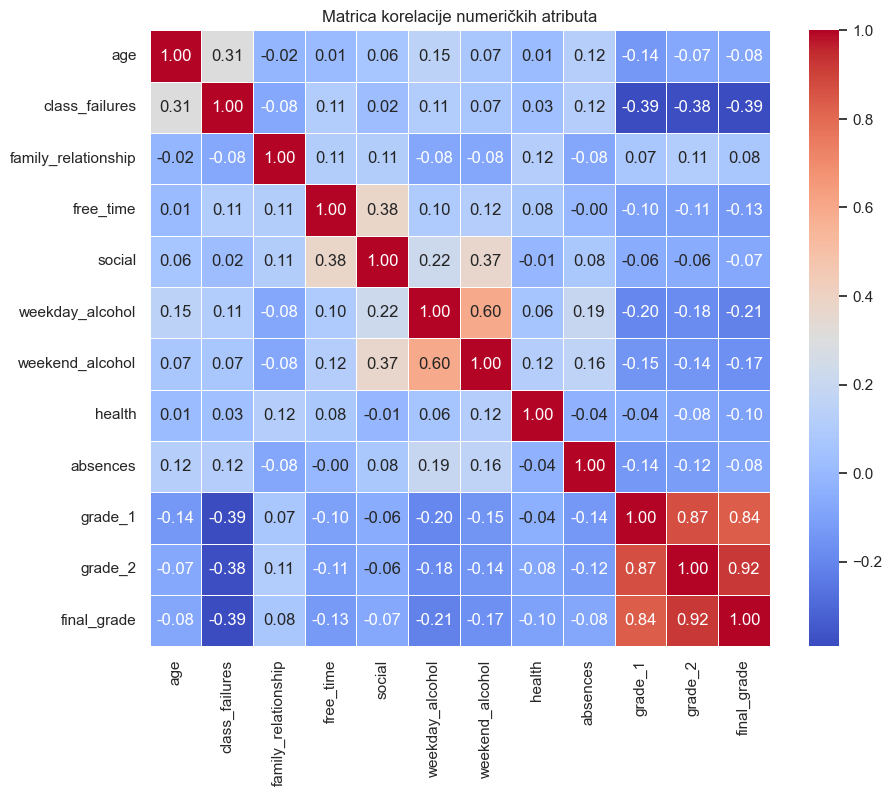

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Učitaj podatke
file_path = "data/portuguese_train.csv"
data = pd.read_csv(file_path)

# Izdvoji X i y
X = data.drop(["student_id", "higher_ed"], axis=1)
y = data["higher_ed"]

# Izdvoji kolone grade_1, grade_2 i final_grade
#grades = data[["grade_1", "grade_2", "final_grade"]]

# Vizualizacija korelacija između numeričkih atributa
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_data = X[numeric_features]
numeric_corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrica korelacije numeričkih atributa')
plt.show()







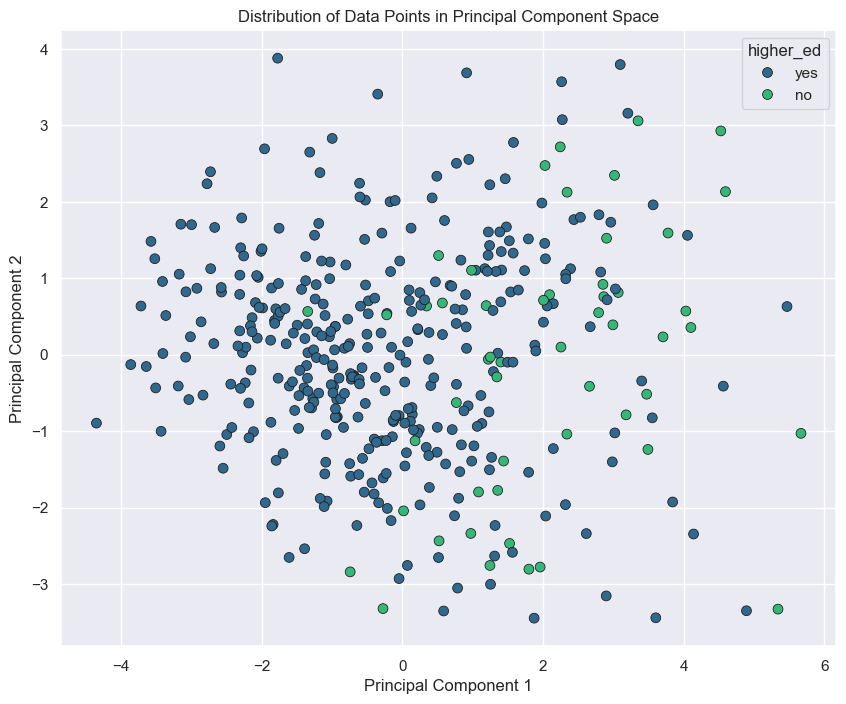

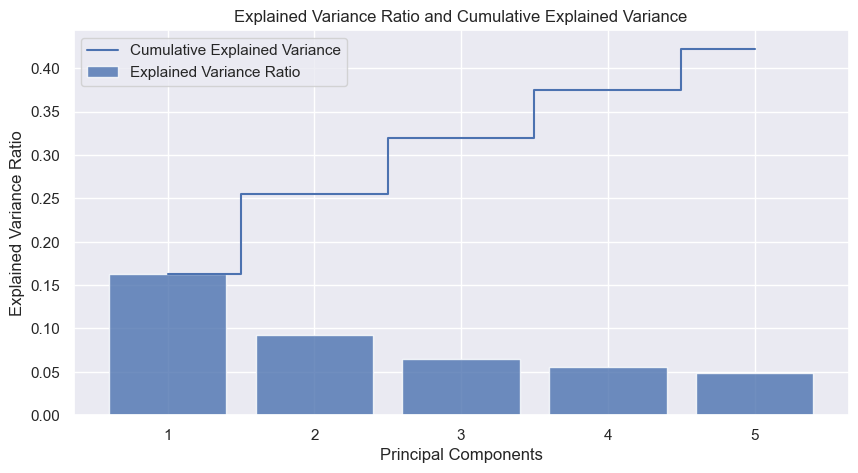

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

file_path = "data/portuguese_train.csv"
data = pd.read_csv(file_path)

X = data.drop(["student_id", "higher_ed"], axis=1)
y = data["higher_ed"]

# Podela skupa na trening, validacioni i test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def apply_pca(X_train, X_val, X_test, num_components=5):
    # Kreiraj transformer za numeričke podatke
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_features = X_train.select_dtypes(include=['object']).columns
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Dodaj preprocesor u model
    pca_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=num_components))
    ])

    # Fituj model na trening podacima
    X_train_pca = pca_model.fit_transform(X_train)

    # Transformiši validacioni i test skup koristeći isti PCA model
    X_val_pca = pca_model.transform(X_val)
    X_test_pca = pca_model.transform(X_test)

    # Izdvoji PCA model kao zaseban objekat
    pca = pca_model.named_steps['pca']

    return X_train_pca, X_val_pca, X_test_pca, pca

# Pozovi funkciju za PCA model 
X_train_pca, X_val_pca, X_test_pca, pca = apply_pca(X_train, X_val, X_test)

# Prikazi explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()

# Vizualizacija raspodele tačaka u prostoru glavnih komponenti sa seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', edgecolor='k', s=50)
plt.title('Distribution of Data Points in Principal Component Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Vizualizacija objašnjene varijanse
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.8, align='center', label='Explained Variance Ratio')
plt.step(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend()
plt.show()


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Najbolji parametri: {'logistic_regression__C': 0.1}
Accuracy: 0.8879310344827587
Confusion Matrix:
[[ 4  8]
 [ 5 99]]


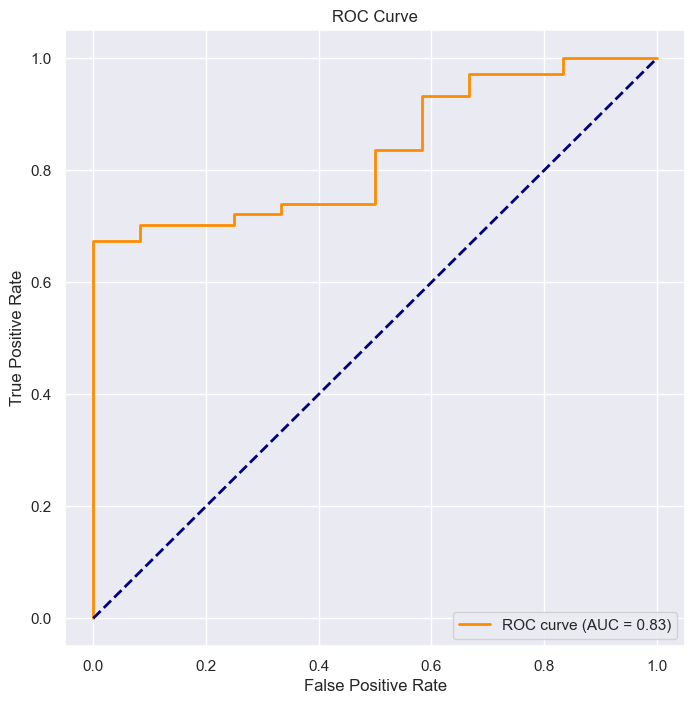

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Učitaj podatke
train_data = pd.read_csv("data/portuguese_train.csv")
test_data = pd.read_csv("data/portuguese_test.csv")

# Podela podataka na features (X) i ciljnu promenljivu (y)
X_train = train_data.drop(["student_id", "higher_ed"], axis=1)  # Change to "higher_ed"
y_train = LabelEncoder().fit_transform(train_data["higher_ed"])  # Convert labels to numerical values

# Podela na trening i validacioni skup
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Preprocesiranje podataka
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Kreiranje modela sa logističkom regresijom
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic_regression', LogisticRegression(max_iter=1000))  # Increase max_iter to avoid convergence warning
])

# Definisanje parametara za optimizaciju
param_grid = {
    'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Inicijalizujte GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fitujte model na trening podacima
grid_search.fit(X_train, y_train)

# Prikazi najbolje parametre
print("Najbolji parametri:", grid_search.best_params_)

# Predikcija na validacionom skupu
y_val_pred = grid_search.predict(X_val)

# Evaluacija modela
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
y_val_prob = grid_search.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Vizualizacija ROC krive
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


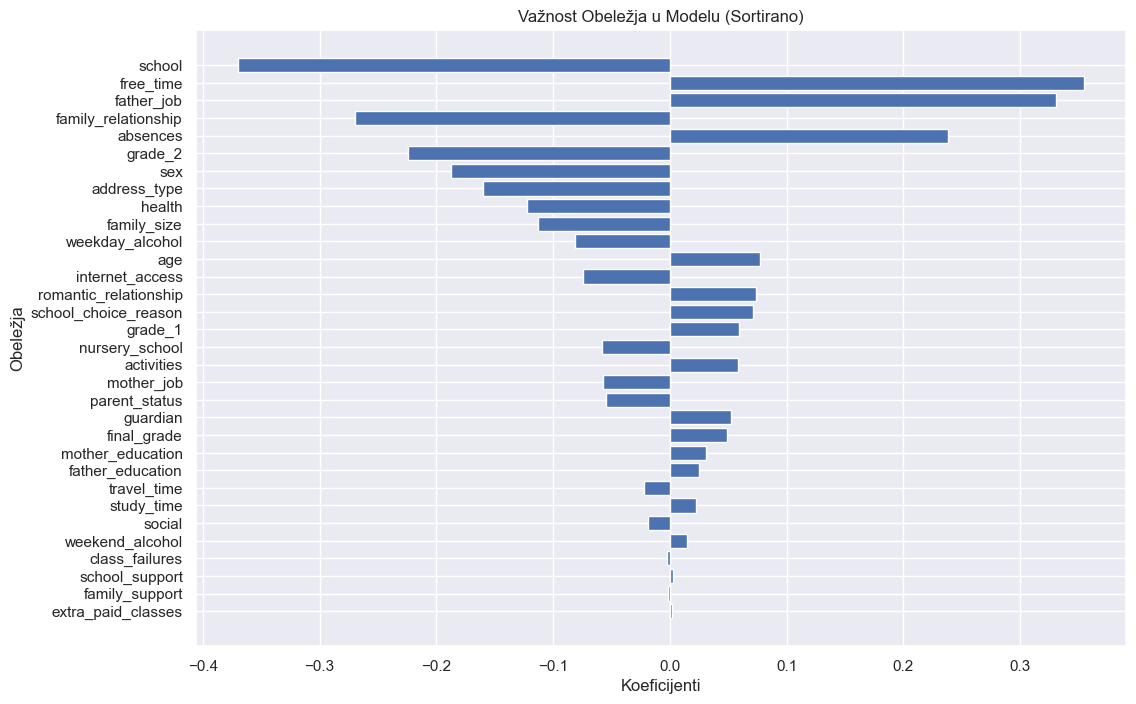

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Dobijanje koeficijenata logističkog modela
coefficients = grid_search.best_estimator_.named_steps['logistic_regression'].coef_[0]

# Sortiranje indeksa obeležja prema apsolutnim vrednostima koeficijenata
sorted_indices = np.argsort(np.abs(coefficients))

# Provera da li index 38 postoji u DataFrame-u
extended_indices = [index for index in sorted_indices if index < len(X_train.columns)]

# Sortiranje obeležja i njihovih koeficijenata
sorted_features = X_train.columns[extended_indices]
sorted_coefficients = coefficients[extended_indices]

# Vizualizacija važnosti obeležja
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Koeficijenti')
plt.ylabel('Obeležja')
plt.title('Važnost Obeležja u Modelu (Sortirano)')

plt.show()


In [68]:
import pandas as pd

# Učitaj podatke
data = pd.read_csv("data/portuguese_train.csv")

# Izračunaj verovatnoću
total_samples = len(data)
matching_samples = len(data[(data['mother_job'] == 'teacher') & (data['higher_ed'] == 'yes')])

probability = matching_samples / total_samples

print(f"Verovatnoća da je higher_ed 'yes' kada je mother 'teacher': {probability:.2%}")

matching_samples = len(data[(data['mother_job'] == 'at_home') & (data['higher_ed'] == 'yes')])

probability = matching_samples / total_samples

print(f"Verovatnoća da je higher_ed 'yes' kada je mother 'at home': {probability:.2%}")

matching_samples = len(data[(data['mother_job'] == 'teacher') & (data['higher_ed'] == 'yes')])

probability = matching_samples / total_samples

print(f"Verovatnoća da je higher_ed 'yes' kada je mother 'health', kao i za other, services jako je mala razlika...: {probability:.2%}")



Verovatnoća da je higher_ed 'yes' kada je mother 'teacher': 10.17%
Verovatnoća da je higher_ed 'yes' kada je mother 'at home': 17.93%
Verovatnoća da je higher_ed 'yes' kada je mother 'health', kao i za other, services jako je mala razlika...: 10.17%


In [69]:
import pandas as pd

# Učitaj podatke
data = pd.read_csv("data/portuguese_train.csv")

# Izračunaj verovatnoću
total_samples = len(data)
matching_samples = len(data[(data['parent_status'] == 'Living together') & (data['higher_ed'] == 'yes')])

probability = matching_samples / total_samples

print(f"Verovatnoća da je higher_ed 'yes' kada roditelji deteta zive zajedno': {probability:.2%}")

matching_samples = len(data[(data['parent_status'] == 'Apart') & (data['higher_ed'] == 'yes')])

probability = matching_samples / total_samples

print(f"Verovatnoća da je higher_ed 'yes' kada su roditelji razdvojeni: {probability:.2%}")



Verovatnoća da je higher_ed 'yes' kada roditelji deteta zive zajedno': 78.28%
Verovatnoća da je higher_ed 'yes' kada su roditelji razdvojeni: 9.83%
